# Yelp Data Challenge - Clustering and PCA

BitTiger DS501

Jun 2017

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [20]:
df = pd.read_csv('data/last_2_years_restaurant_reviews.csv')

In [21]:
df.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,type,useful,user_id,count
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2015-06-26,0,nCqdz-NW64KazpxqnDr0sQ,1,I mainly went for the ceasar salad prepared ta...,review,0,0XVzm4kVIAaH4eQAxWbhvw,318
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Restaurants, Cajun/Creole]",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,review,0,2aeNFntqY2QDZLADNo8iQQ,318


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [22]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values
documents.shape

(348016,)

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [23]:
# Make a column and take the values, save to a variable named "target"
target = (df['stars'] == 5).astype(int).values
target.shape

(348016,)

#### You may want to look at the statistic of the target variable

In [24]:
# To be implemented
print('statistics of the target variable')
print('median value: %f' % (np.median(target)))
print('mean value: %f' % (np.mean(target)))
print('standard deviation value: %f' % (np.std(target)))

statistics of the target variable
median value: 0.000000
mean value: 0.460668
standard deviation value: 0.498451


### Create training dataset and test dataset

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
x_train, x_test, y_train, y_test = train_test_split(documents, target, test_size = 0.8, random_state = 0)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [28]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 2000)

In [29]:
# Train the model with your training data
train_vector = vectorizer.fit_transform(x_train).toarray()

In [30]:
# Get the vocab of your tfidf
vocab = vectorizer.get_feature_names()

In [31]:
# Use the trained model to transform all the reviews
# transformed trained model => train_vector
# transformed test model => test_vector
test_vector = vectorizer.transform(x_test)

In [32]:
print 'shape of trainsformed training data:', train_vector.shape
print 'shape of trainsformed testing data:', test_vector.shape

shape of trainsformed training data: (69603, 2000)
shape of trainsformed testing data: (278413, 2000)


### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import euclidean

In [34]:
# choose the best K
"""
SSE_List = []
Silhouette_List = []
cluster_choices = [5,10,20,40]
for i in cluster_choices:
    print('%d center cluster is complete' % (i))
    kmeans = KMeans(n_clusters=i, random_state=0).fit(train_vector)
    SSE_List.append(kmeans.inertia_)
    Silhouette_List.append(silhouette_score(train_vector, kmeans.labels_))
"""

"\nSSE_List = []\nSilhouette_List = []\ncluster_choices = [5,10,20,40]\nfor i in cluster_choices:\n    print('%d center cluster is complete' % (i))\n    kmeans = KMeans(n_clusters=i, random_state=0).fit(train_vector)\n    SSE_List.append(kmeans.inertia_)\n    Silhouette_List.append(silhouette_score(train_vector, kmeans.labels_))\n"

In [35]:
# plot the SSE and Silhouette metric results
"""
plt.subplot(211)
plt.plot(cluster_choices, SSE_List)
plt.ylabel('SSE')
plt.subplot(212)
plt.plot(cluster_choices, Silhouette_List)
plt.ylabel('Silhouette')
plt.show()
"""

"\nplt.subplot(211)\nplt.plot(cluster_choices, SSE_List)\nplt.ylabel('SSE')\nplt.subplot(212)\nplt.plot(cluster_choices, Silhouette_List)\nplt.ylabel('Silhouette')\nplt.show()\n"

#### Make predictions on all your data

In [36]:
kmeans = KMeans(n_clusters = 20, random_state=42)
kmeans.fit(train_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [37]:
# To be implemented
doc_vector = vectorizer.fit_transform(documents).toarray()
target_pred = kmeans.predict(doc_vector)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [38]:
# To be implemented
def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order


#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [39]:
# To be implemented
n = 10
for index, point in enumerate(kmeans.cluster_centers_):
    print('%d center has the top prominent words:' % (index))
    print(get_top_values(point, n, vocab))

0 center has the top prominent words:
[u'ordered', u'like', u'good', u'sauce', u'just', u'food', u'place', u'got', u'cheese', u'meat']
1 center has the top prominent words:
[u'steak', u'good', u'great', u'ordered', u'service', u'food', u'place', u'cooked', u'best', u'medium']
2 center has the top prominent words:
[u'great', u'food', u'service', u'place', u'amazing', u'awesome', u'atmosphere', u'staff', u'friendly', u'definitely']
3 center has the top prominent words:
[u'good', u'food', u'service', u'really', u'place', u'nice', u'pretty', u'great', u'time', u'like']
4 center has the top prominent words:
[u'vegas', u'best', u'las', u'food', u'place', u've', u'amazing', u'service', u'great', u'time']
5 center has the top prominent words:
[u'pho', u'broth', u'good', u'place', u'rolls', u'vietnamese', u'spring', u'service', u'food', u'great']
6 center has the top prominent words:
[u'sushi', u'rolls', u'place', u'roll', u'ayce', u'great', u'fresh', u'fish', u'good', u'eat']
7 center has the 

#### Try different k
If you set k == to a different number, how does the top features change?

In [40]:
# To be implemented
kmeans = KMeans(n_clusters = 10, random_state=42)
kmeans.fit(train_vector)
target_pred = kmeans.predict(doc_vector)
for index, point in enumerate(kmeans.cluster_centers_):
    print('%d center has the top n prominent words:' % (index))
    print(get_top_values(point, n, vocab))

0 center has the top n prominent words:
[u'sushi', u'rolls', u'roll', u'place', u'ayce', u'great', u'fresh', u'good', u'fish', u'service']
1 center has the top n prominent words:
[u'chicken', u'fried', u'good', u'rice', u'food', u'thai', u'ordered', u'place', u'sauce', u'great']
2 center has the top n prominent words:
[u'burger', u'fries', u'burgers', u'good', u'cheese', u'shake', u'place', u'food', u'great', u'ordered']
3 center has the top n prominent words:
[u'pizza', u'crust', u'good', u'place', u'great', u'cheese', u'best', u'just', u'pepperoni', u'slice']
4 center has the top n prominent words:
[u'food', u'order', u'minutes', u'time', u'service', u'just', u'came', u'table', u'asked', u'said']
5 center has the top n prominent words:
[u'great', u'food', u'service', u'place', u'good', u'friendly', u'awesome', u'atmosphere', u'staff', u'definitely']
6 center has the top n prominent words:
[u'love', u'place', u'food', u'great', u'service', u'good', u'amazing', u'friendly', u'delicious

The words are quite similar to each other

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [41]:
# To be implemented
rand_index = 42
print('chosen review:')
print(documents[rand_index])
print('chosen rating:')
print(target[rand_index])
print('top n prominent words:')
print(get_top_values(kmeans.cluster_centers_[target_pred[rand_index]], n, vocab))


chosen review:
The strip steak was to die for! The banana desert was absolutely genius. Our server (forgot her name) was fantastic! My hubby's rib eye was good! We will be going back!
chosen rating:
0
top n prominent words:
[u'good', u'food', u'place', u'like', u'service', u'really', u'just', u'nice', u'delicious', u'ordered']


## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [42]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
max_count = np.max(df['count'])
max_count

4015

In [43]:
business_id = df[df['count'] == max_count]['business_id'].unique()
business_id

array(['hihud--QRriCYZw1zZvW4g'], dtype=object)

In [44]:
df_top_restaurant = df[df['business_id'] == business_id[0]]

We can also load restaurant profile information from the business dataset (optional)

In [45]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)
pass

### Vectorize the text feature

In [46]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values
documents_top_restaurant.shape


(4015,)

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [47]:
# To be implemented
target_top_restaurant = (df_top_restaurant['stars'] == 5).astype(int).values
target_top_restaurant.shape

(4015,)

#### Check the statistic of the target variable

In [48]:
# To be implemented
print('statistics of the target variable')
print('median value: %f' % (np.median(target_top_restaurant)))
print('mean value: %f' % (np.mean(target_top_restaurant)))
print('standard deviation value: %f' % (np.std(target_top_restaurant)))

statistics of the target variable
median value: 1.000000
mean value: 0.764633
standard deviation value: 0.424228


### Create training dataset and test dataset

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
x_train, x_test, y_train, y_test = train_test_split(documents_top_restaurant, target_top_restaurant, test_size = 0.3, random_state = 0)

### Get NLP representation of the documents

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer_top = TfidfVectorizer(stop_words = 'english', max_features = 2000)

In [53]:
# Train the model with your training data
train_vector_top = vectorizer_top.fit_transform(x_train).toarray()

In [54]:
# Get the vocab of your tfidf
vocab_top = vectorizer_top.get_feature_names()

In [55]:
# Use the trained model to transform the test data
test_vector_top = vectorizer_top.transform(x_test).toarray()

In [56]:
# Use the trained model to transform all the data
doc_vector_top = vectorizer_top.transform(documents_top_restaurant).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [57]:
# To be implemented
kmeans = KMeans(n_clusters = 20, random_state=42)
kmeans.fit(train_vector_top)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [58]:
# To be implemented
target_labels = kmeans.predict(doc_vector_top)

#### Inspect the centroids

In [59]:
# To be implemented
for index, center in enumerate(kmeans.cluster_centers_):
    print('%d center: ' % (index))
    print(center)

0 center: 
[  1.40946282e-18   1.56125113e-17   4.99801825e-03 ...,   1.30104261e-18
   0.00000000e+00   8.67361738e-19]
1 center: 
[  2.16840434e-19   5.00937231e-03  -1.95156391e-18 ...,   1.45187767e-03
   0.00000000e+00   9.75781955e-19]
2 center: 
[  8.61280755e-04   1.14603344e-02   8.81826599e-04 ...,   1.62630326e-18
   0.00000000e+00   9.75781955e-19]
3 center: 
[ -4.01154804e-18   1.15319126e-03  -1.95156391e-18 ...,   1.77108012e-03
   1.78893358e-18   1.90187997e-03]
4 center: 
[  2.35020877e-03   1.40436555e-02   1.62503074e-03 ...,   2.61653260e-03
   1.14663367e-03  -3.25260652e-18]
5 center: 
[  1.51788304e-18   2.87079580e-03   1.94707403e-03 ...,   9.71807657e-04
   0.00000000e+00   4.78826105e-03]
6 center: 
[  1.40946282e-18   5.13578845e-03  -1.73472348e-18 ...,   1.40946282e-18
   0.00000000e+00   8.67361738e-19]
7 center: 
[  2.72178900e-03   1.01285846e-03   2.12413755e-03 ...,   6.50521303e-19
   0.00000000e+00   7.58941521e-19]
8 center: 
[  4.14350916e-03   8

#### Find the top 10 features for each cluster.

In [60]:
# To be implemented
n = 10
for index, point in enumerate(kmeans.cluster_centers_):
    print('%d center has the top prominent words:' % (index))
    print(get_top_values(point, n, vocab_top))

0 center has the top prominent words:
[u'meat', u'lovers', u'lover', u'ordered', u'great', u'food', u'delicious', u'service', u'definitely', u'got']
1 center has the top prominent words:
[u'definitely', u'recommend', u'time', u'food', u'friends', u'come', u'amazing', u'service', u'friendly', u'place']
2 center has the top prominent words:
[u'happy', u'hour', u'great', u'food', u'good', u'place', u'service', u'came', u'awesome', u'come']
3 center has the top prominent words:
[u'great', u'meats', u'korean', u'food', u'dishes', u'service', u'meat', u'bbq', u'good', u'marinated']
4 center has the top prominent words:
[u'place', u'food', u'just', u'good', u'like', u'service', u'came', u'pretty', u'kbbq', u'time']
5 center has the top prominent words:
[u'spicy', u'chicken', u'tuna', u'kimbap', u'good', u'pork', u'food', u'great', u'korean', u'lemon']
6 center has the top prominent words:
[u'really', u'good', u'food', u'enjoyed', u'great', u'service', u'come', u'place', u'definitely', u'atmos

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [61]:
# To be implemented
rand_index = 42
print('chosen review:')
print(documents_top_restaurant[rand_index])
print('chosen rating:')
print(target_top_restaurant[rand_index])
print('top n prominent words:')
print(get_top_values(kmeans.cluster_centers_[target_labels[rand_index]], n, vocab_top))

chosen review:
Authentic Korean BBQ with a grill in the table. The wait staff was friendly. They were helpfull in deciding what to order and explaining what the dishes were. I especially like the big screen tv with music videos playing.
chosen rating:
1
top n prominent words:
[u'great', u'meats', u'korean', u'food', u'dishes', u'service', u'meat', u'bbq', u'good', u'marinated']


## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [62]:
from sklearn.preprocessing import StandardScaler
# To be implemented

scaler = StandardScaler()
doc_scale = scaler.fit_transform(doc_vector_top)
x_train_scale, x_test_scale, y_train, y_test = train_test_split(doc_scale, target_top_restaurant, test_size = 0.3, random_state = 0)

### Use PCA to transform data (train and test) and get princial components

In [63]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 2000
pca = PCA(n_components=n_components)
train_components = pca.fit_transform(x_train_scale)
test_components = pca.transform(x_test_scale)
print(train_components.T.dot(train_components).shape)
total_variance = np.sum(train_components.T.dot(train_components))

n_components = 50

pca = PCA(n_components=n_components)
train_components = pca.fit_transform(x_train_scale)
test_components = pca.transform(x_test_scale)
explained_variance = np.sum(train_components.T.dot(train_components))
print(train_components.T.dot(train_components).shape)

(2000, 2000)
(50, 50)


In [64]:
print(total_variance)
print(explained_variance)

5974785.68905
586620.119405


### See how much (and how much percentage of) variance the principal components explain

In [65]:
percent = explained_variance / total_variance * 100
print("explained variance with 50 principal components: %f percent" % percent)

explained variance with 50 principal components: 9.818262 percent


### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

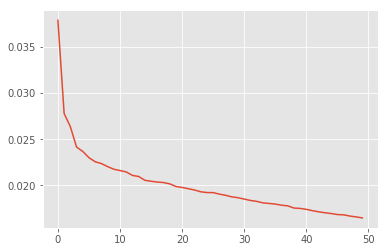

In [66]:
# To be implemented
variance = train_components.T.dot(train_components).sum(axis = 0) / explained_variance
plt.plot(variance)

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [67]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression
LogisticModel = LogisticRegression(C = 0.01)
LogisticModel.fit(x_train_scale, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
# Get score for training set
LogisticModel.score(x_train_scale, y_train)

0.96903914590747331

In [69]:
# Get score for test set
LogisticModel.score(x_test_scale, y_test)

0.74854771784232366

#### Use (Stardardized + PCA) tf-idf vectors as features

In [70]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

# To be implemented
LogisticModel = LogisticRegression(C = 0.01)
LogisticModel.fit(train_components, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
# Get score for training set
LogisticModel.score(train_components, y_train)

0.79893238434163705

In [72]:
# Get score for test set, REMEMBER to use PCA-transformed X!
LogisticModel.score(test_components, y_test)

0.78921161825726138

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

A: (insert your comments here)

1. It is less likely to overfit, because it reduces the dimensionality and ease the curse of dimensionality
2. The test score is higher than that without PCA

#### You can plot the coefficients against principal components


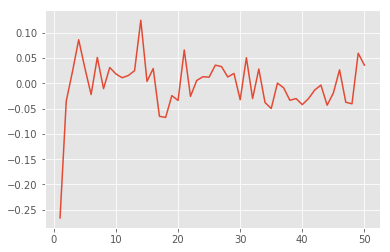

In [73]:
# To be implemented
PCA_Name = range(1, 51)
plt.plot(PCA_Name, LogisticModel.coef_[0])

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [74]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

RandomForestModel = RandomForestClassifier(criterion = 'entropy', min_samples_split=20)
RandomForestModel.fit(x_train_scale, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [75]:
# Get score for training set
RandomForestModel.score(x_train_scale, y_train)

0.94697508896797156

In [76]:
# Get score for test set
RandomForestModel.score(x_test_scale, y_test)

0.75850622406639001

#### Use (Stardardized + PCA) tf-idf vectors as features

In [77]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

RandomForestModel = RandomForestClassifier(criterion = 'entropy', min_samples_split=20)
RandomForestModel.fit(train_components, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [78]:
# Get score for training set
RandomForestModel.score(train_components, y_train)

0.90569395017793597

In [79]:
# Get score for test set, REMEMBER to use PCA-transformed X!
RandomForestModel.score(test_components, y_test)

0.76431535269709538

#### Q: What do you see from the training result and the test result?

A: (insert your comments here)

1. It did not have much effect since it does not use the distance to train. Therefore, it will not help much to avoid overfit
2. The model performs a little bit worse than the un-PCA-ed model because it loses information when PCA is applied and causes some information to be thrown away because of their low-importance

#### You can plot the feature importances against principal components


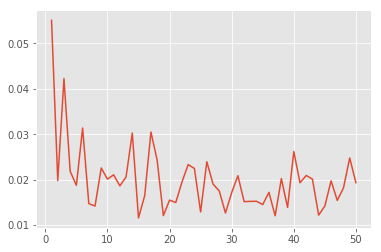

In [80]:
# To be implemented
plt.plot(PCA_Name, RandomForestModel.feature_importances_)

## Extra Credit #1: Can you cluster restaurants from their category information?
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [81]:
# preprocessing the categories data
docs = df['categories'].values
target = (df['stars'] == 5).astype(int).values
doc = [doc[1:-1] for doc in docs]



In [82]:
# vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(doc, target, test_size = 0.8, random_state = 0)

vectorizer_categories = TfidfVectorizer(stop_words = 'english', max_features = 2000)
train_vector_categories = vectorizer_categories.fit_transform(x_train).toarray()
vocab_categories = vectorizer_categories.get_feature_names()
test_vector_categories = vectorizer_categories.transform(x_test).toarray()

In [83]:
# cluster restaurants
kmeans = KMeans(n_clusters = 20, random_state=42)
kmeans.fit(train_vector_categories)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [84]:
doc_vector_categories = vectorizer_categories.transform(doc).toarray()
labels = kmeans.predict(doc_vector_categories)

In [85]:
for index, point in enumerate(kmeans.cluster_centers_):
    print('%d center has the top prominent words:' % (index))
    print(get_top_values(point, n, vocab_categories))

0 center has the top prominent words:
[u'barbeque', u'korean', u'plates', u'small', u'tapas', u'restaurants', u'japanese', u'fusion', u'asian', u'soul']
1 center has the top prominent words:
[u'bars', u'nightlife', u'mexican', u'sports', u'restaurants', u'lounges', u'pubs', u'american', u'traditional', u'seafood']
2 center has the top prominent words:
[u'burgers', u'tapas', u'restaurants', u'small', u'plates', u'spanish', u'salad', u'gastropubs', u'american', u'bars']
3 center has the top prominent words:
[u'breakfast', u'brunch', u'american', u'traditional', u'restaurants', u'new', u'sandwiches', u'burgers', u'diners', u'food']
4 center has the top prominent words:
[u'italian', u'restaurants', u'seafood', u'american', u'delis', u'traditional', u'nightlife', u'new', u'bars', u'steakhouses']
5 center has the top prominent words:
[u'asian', u'fusion', u'restaurants', u'chinese', u'japanese', u'bars', u'hawaiian', u'food', u'mexican', u'nightlife']
6 center has the top prominent words:
[u

## Extra Credit #2: Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 

Hint: You can take a look at [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

#### Q: How do you compare with Cosine distance or Euclidean distance?

Cosine Distance is less influenced by the curse of dimensionality than the Euclidean Distance.

In [86]:
train_vector_categories.shape

(69603, 406)

In [87]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine
from scipy.spatial.distance import jaccard
from scipy.spatial.distance import correlation
from collections import defaultdict

import random

'''
class Customized_KMeans():
    def __init__(self, k, iterations = 300, distFunc = euclidean):
        self.k = k
        self.distFunc = distFunc
        self.iterations = iterations
        self.cluster_centers = []
        self.inertia = 0
    
    def initial(self, X):
        index = random.randint(0, X.shape[0] - 1) # find the first one
        centers = [tuple(X[index])]
        while len(centers) < self.k:
            default_dist = 0
            default_center = []
            for pt in X:
                min_dist = np.min([self.distFunc(center, pt) for center in centers])
                if min_dist > default_dist:
                    default_dist = min_dist
                    default_center = tuple(pt)
            centers.append(default_center)
        return centers
        
    def fit(self, X):
        self.cluster_centers = self.initial(X)
        print('initialization complete')
        for it in xrange(self.iterations):
            clusters = defaultdict(list)
            labels = self.predict(X)
            new_centers = []
            for i in xrange(X.shape[0]):
                clusters[labels[i]].append(X[i])
            for i in range(self.k):
                new_centers.append(np.mean(clusters[i], axis = 0))
            new_centers = [tuple(center) for center in new_centers]
            if set(self.cluster_centers) == set(new_centers):
                break
            self.cluster_centers = new_centers
    
    
    def predict(self, X):
        label = []
        for pt in X:
            dist_list = [self.distFunc(pt, center) for center in self.cluster_centers]
            label.append(np.argmin(dist_list))
        return label
'''
def initial(X, distFunc, k):
    index = random.randint(0, X.shape[0] - 1) # find the first one
    centers = [tuple(X[index])]
    while len(centers) < k:
        default_dist = 0
        default_center = []
        for pt in X:
            min_dist = np.min([distFunc(center, pt) for center in centers])
            if min_dist > default_dist:
                default_dist = min_dist
                default_center = tuple(pt)
        centers.append(default_center)
    return centers
def k_means(X, distFunc, k=5, max_iter=300):
    """Performs k means

    Args:
    - X - feature matrix
    - k - number of clusters
    - max_iter - maximum iteratations

    Returns:
    - clusters - dict mapping cluster centers to observations
    """
    centers = [tuple(pt) for pt in initial(X, distFunc, k)]
    for i in xrange(max_iter):
        clusters = defaultdict(list)

        for datapoint in X:
            distances = [distFunc(datapoint, center) for center in centers]
            center = centers[np.argmin(distances)]
            clusters[center].append(datapoint)

        new_centers = []
        for center, pts in clusters.iteritems():
            new_center = np.mean(pts, axis=0)
            new_centers.append(tuple(new_center))

        if set(new_centers) == set(centers):
            break

        centers = new_centers

    return clusters, centers

In [88]:
def printFeatures(cluster, vocab):
    for index, point in enumerate(cluster):
        print('%d center has the top prominent words:' % (index))
        print(get_top_values(point, n, vocab))


In [89]:
euclidean_clusters, euclidean_centers = k_means(train_vector_categories, euclidean)
print('Euclidean Prediction Complete')
printFeatures(euclidean_clusters, vocab_categories)

Euclidean Prediction Complete
0 center has the top prominent words:
[u'food', u'brunch', u'breakfast', u'restaurants', u'fast', u'sandwiches', u'tea', u'burgers', u'coffee', u'cafes']
1 center has the top prominent words:
[u'american', u'new', u'traditional', u'restaurants', u'bars', u'breakfast', u'brunch', u'nightlife', u'burgers', u'steakhouses']
2 center has the top prominent words:
[u'pizza', u'italian', u'restaurants', u'wings', u'chicken', u'sandwiches', u'food', u'bars', u'salad', u'nightlife']
3 center has the top prominent words:
[u'japanese', u'sushi', u'bars', u'restaurants', u'fusion', u'asian', u'ramen', u'tapas', u'plates', u'small']
4 center has the top prominent words:
[u'restaurants', u'mexican', u'bars', u'nightlife', u'italian', u'chinese', u'steakhouses', u'seafood', u'thai', u'burgers']


In [90]:
cosine_clusters, cosine_centers = k_means(train_vector_categories, cosine)
print('Cosine Prediction')
printFeatures(cosine_clusters, vocab_categories)

Cosine Prediction
0 center has the top prominent words:
[u'food', u'fast', u'sandwiches', u'restaurants', u'brunch', u'breakfast', u'tea', u'cafes', u'coffee', u'burgers']
1 center has the top prominent words:
[u'italian', u'pizza', u'restaurants', u'bars', u'food', u'nightlife', u'wine', u'salad', u'american', u'wings']
2 center has the top prominent words:
[u'american', u'restaurants', u'new', u'bars', u'traditional', u'mexican', u'nightlife', u'steakhouses', u'brunch', u'breakfast']
3 center has the top prominent words:
[u'japanese', u'sushi', u'bars', u'restaurants', u'chinese', u'asian', u'fusion', u'barbeque', u'korean', u'vietnamese']
4 center has the top prominent words:
[u'thai', u'restaurants', u'vegetarian', u'mediterranean', u'indian', u'event', u'services', u'planning', u'hotels', u'greek']


In [91]:
correlation_clusters, correlation_centers = k_means(train_vector_categories, correlation)
print('Correlation Prediction')
printFeatures(correlation_clusters, vocab_categories)

Correlation Prediction
0 center has the top prominent words:
[u'food', u'burgers', u'restaurants', u'fast', u'tea', u'cafes', u'coffee', u'sandwiches', u'vegan', u'desserts']
1 center has the top prominent words:
[u'chinese', u'restaurants', u'asian', u'fusion', u'japanese', u'korean', u'barbeque', u'thai', u'vietnamese', u'noodles']
2 center has the top prominent words:
[u'american', u'breakfast', u'brunch', u'traditional', u'restaurants', u'new', u'steakhouses', u'buffets', u'sandwiches', u'burgers']
3 center has the top prominent words:
[u'bars', u'nightlife', u'mexican', u'restaurants', u'sushi', u'japanese', u'american', u'wine', u'new', u'sports']
4 center has the top prominent words:
[u'pizza', u'italian', u'restaurants', u'food', u'american', u'bars', u'sandwiches', u'wings', u'chicken', u'salad']


In [92]:
jaccard_clusters, jaccard_centers = k_means(train_vector_categories, jaccard)
print('Jaccard Prediction')
printFeatures(jaccard_clusters, vocab_categories)

Jaccard Prediction
0 center has the top prominent words:
[u'restaurants', u'bars', u'american', u'food', u'new', u'nightlife', u'traditional', u'mexican', u'brunch', u'breakfast']
1 center has the top prominent words:
[u'soup', u'salad', u'mexican', u'nightlife', u'bars', u'restaurants', u'eastern', u'education', u'entertainment', u'estate']


## Extra Credit #3: Can you cluster categories from business entities? What does it mean by a cluster?
Hint: Think the example where words can be clustered from the transposed tf-idf matrix.

Clustering categories from business entities is to categorize each "business entity"/"business id". That is to classify each entity into similar categories

In [93]:
entities = df[['business_id', 'categories']]
entities = entities.drop_duplicates()
category = entities['categories'].values
category_name = np.array([name[1:-1] for name in category])
target = np.zeros(category_name.shape)
x_train, x_test, y_train, y_test = train_test_split(category_name, target, test_size = 0.3, random_state = 0)

In [94]:
category_name[0]

'Steakhouses, Restaurants, Cajun/Creole'

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 2000)
train_vector = vectorizer.fit_transform(x_train).toarray()
vocab = vectorizer.get_feature_names()
test_vector = vectorizer.transform(x_test).toarray()
category_vector = vectorizer.transform(category_name).toarray()


In [96]:
kmeans_cluster = KMeans(n_clusters = 5, random_state = 42)
kmeans_cluster.fit(train_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [97]:
category_label = kmeans_cluster.predict(category_vector)
data_col = {'categories': category, 'label': category_label}
df_label = pd.DataFrame(data = data_col)
df_label.head(5)

,categories,label
0,"[Steakhouses, Restaurants, Cajun/Creole]",1
1,"[Restaurants, Korean, Sushi Bars]",0
2,"[Restaurants, Bars, Nightlife, Seafood, Americ...",0
3,"[Restaurants, Thai]",1
4,"[Buffets, Restaurants]",1


In [98]:
df_merge = pd.merge(entities, df_label, how='outer', left_on='categories', right_on='categories')
df_merge.head(5)

,business_id,categories,label
0,--9e1ONYQuAa-CB_Rrw7Tw,"[Steakhouses, Restaurants, Cajun/Creole]",1
1,-1vfRrlnNnNJ5boOVghMPA,"[Restaurants, Korean, Sushi Bars]",0
2,-3zffZUHoY8bQjGfPSoBKQ,"[Restaurants, Bars, Nightlife, Seafood, Americ...",0
3,-8R_-EkGpUhBk55K9Dd4mg,"[Restaurants, Thai]",1
4,-8R_-EkGpUhBk55K9Dd4mg,"[Restaurants, Thai]",1


In [99]:
df_merge.shape
df_merge['label'].value_counts()

1    35813
2    10706
3     9672
4     1961
0     1308
Name: label, dtype: int64

In [100]:
for index, point in enumerate(kmeans_cluster.cluster_centers_):
    print('%d center has the top prominent words:' % (index))
    print(get_top_values(point, n, vocab))

0 center has the top prominent words:
[u'bars', u'nightlife', u'sushi', u'american', u'restaurants', u'sports', u'japanese', u'traditional', u'new', u'pubs']
1 center has the top prominent words:
[u'restaurants', u'mexican', u'food', u'chinese', u'sandwiches', u'thai', u'seafood', u'italian', u'barbeque', u'delis']
2 center has the top prominent words:
[u'pizza', u'restaurants', u'italian', u'wings', u'chicken', u'sandwiches', u'food', u'salad', u'delis', u'burgers']
3 center has the top prominent words:
[u'fast', u'food', u'restaurants', u'burgers', u'sandwiches', u'mexican', u'chinese', u'chicken', u'wings', u'delis']
4 center has the top prominent words:
[u'american', u'traditional', u'new', u'breakfast', u'brunch', u'restaurants', u'burgers', u'diners', u'sandwiches', u'cafes']


## Extra Credit #4: What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"?

How to define 'best represent'? In my opinion, the restaurant is considered to be best representative to the cluster when the distance or similarity is the smallest. Therefore, find the best representative one by comparing the metrics.

In [101]:
from scipy.spatial.distance import euclidean

cluster_center = {}
shape = category_vector.shape
for i in xrange(shape[0]):
    distance = euclidean(category_vector[i], kmeans_cluster.cluster_centers_[category_label[i]])
    if category_label[i] in cluster_center:
        if cluster_center[category_label[i]][1] >= distance:
            cluster_center[category_label[i]] = [i, distance]
    else:
        cluster_center[category_label[i]] = [i, distance]


In [102]:
for key, value in cluster_center.items():
    print('cluster Number: %d' % key)
    print('best represent: %s' % category_name[value[0]])

cluster Number: 0
best represent: Japanese, Bars, Nightlife, American (New), Restaurants, Sushi Bars
cluster Number: 1
best represent: Mexican, Restaurants, Food
cluster Number: 2
best represent: Restaurants, Pizza
cluster Number: 3
best represent: Restaurants, Fast Food
cluster Number: 4
best represent: American (New), Restaurants, American (Traditional), Breakfast & Brunch


## Extra Credit #5: Can you think of other use cases that clustering can be used? 
Hint: of course you can make use of other yelp dataset. You can try anything you want as long as you can explain it.

In [103]:
# To be implemented